In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

In [3]:
plt.style.use('ggplot')
np.random.seed(123)

In [4]:
NMC = 100 # ランダムに点を打つ数
xmc = np.random.rand(NMC) # NMC個のランダムなx点を取得
ymc = np.random.rand(NMC) # NMC個のランダムなy点を取得
r = (xmc ** 2 + ymc**2) ** 0.5 # 中心からの距離
accept = np.where(r <= 1, 1, 0) # NMC個のうち円の中に入ったものを抽出
accept_ratio = np.sum(accept) / NMC
print(accept_ratio)

0.82


$\pi / 4$には少し遠い

In [5]:
NMC = 100 # ランダムに点を打つ数
xmc = np.random.rand(NMC) # NMC個のランダムなx点を取得
ymc = np.random.rand(NMC) # NMC個のランダムなy点を取得

# mcsという引数に[0, NMC]の値を1刻みで渡して実行できるスライドバーを設置b
@interact(mcs=(0, NMC, 1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0, 1, 0.001)
    y = (1 - x ** 2) **0.5 # 扇型を描く
    y2 = np.ones(x.shape[0])
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.3) # 0 ~ yを塗りつぶす
    plt.fill_between(x, y, y2, alpha=0.3) # y ~ y2までを塗りつぶす
    
    r = (xmc[:mcs] ** 2 + ymc[:mcs] **2) ** 0.5 # MCSの個数だけ
    accept = np.where(r <= 1, 1, 0)
    accept_ratio = np.sum(accept) / NMC
    
    plt.scatter(xmc[:mcs], ymc[:mcs], color="black", marker=".")
    plt.show()

    print("Monte Carlo: ", accept_ratio)
    print("Analytical Solution: ", np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

In [31]:
NMC = 1000 # ランダムに点を打つ数
xmc = np.random.rand(NMC) # NMC個のランダムなx点を取得
ymc = np.random.rand(NMC) # NMC個のランダムなy点を取得

pi_mcs = []
for mcs in range(1, NMC):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r <= 1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [32]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

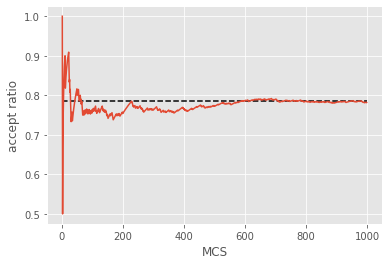

In [33]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")